<a href="https://colab.research.google.com/github/AlexCoilaJrt/10algorimosandREDNEURONAL/blob/main/Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Instalación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Configuración de estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [6]:
# Cargar tus datos
df = pd.read_csv('Mall_Customers.csv')

In [7]:
# Exploración inicial
print("Primeras filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())

Primeras filas del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
No

In [8]:
# Seleccionar características numéricas para clustering
# Usualmente se usan Age, Annual Income y Spending Score
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

In [10]:
# Normalización (IMPORTANTE para clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nDimensiones de los datos: {X_scaled.shape}")


Dimensiones de los datos: (200, 3)


# Algoritmo 1 - K-Means

Descripción:
K-Means divide los datos en K clusters minimizando la varianza intracluster. Cada punto pertenece al cluster con la media más cercana.
Ventajas: Rápido, simple, escalable
Desventajas: Necesita especificar K, sensible a outliers, asume clusters esféricos

In [18]:
# Método del codo para encontrar K óptimo
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

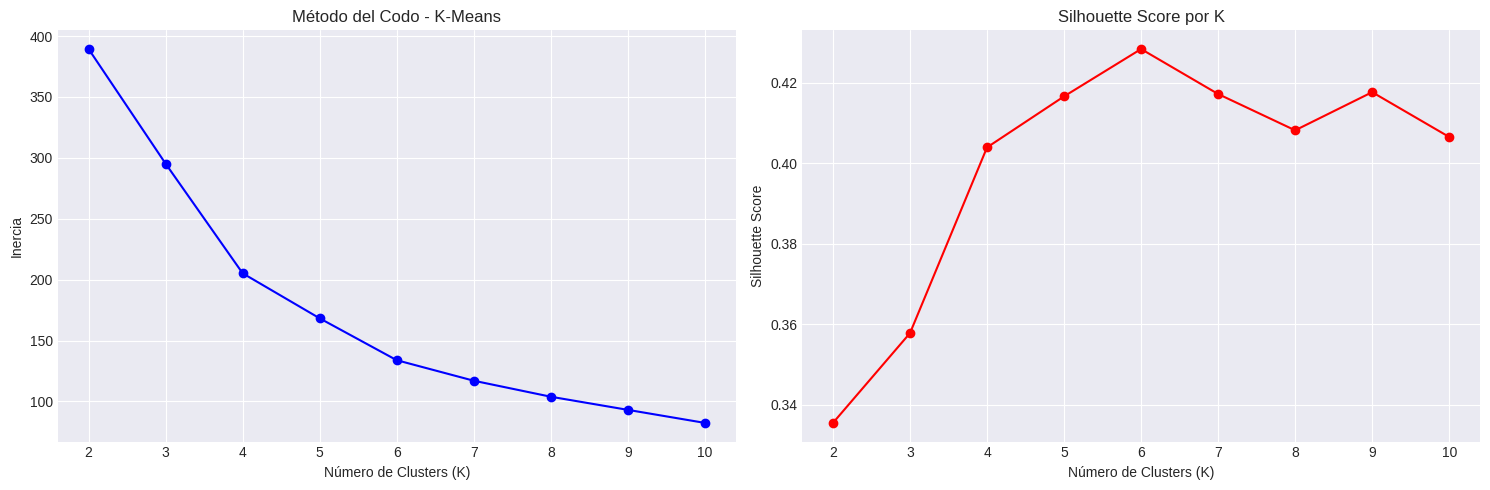

In [12]:
# Visualizar método del codo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(K_range, inertias, 'bo-')
ax1.set_xlabel('Número de Clusters (K)')
ax1.set_ylabel('Inercia')
ax1.set_title('Método del Codo - K-Means')
ax1.grid(True)

ax2.plot(K_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Número de Clusters (K)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score por K')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [19]:
# ============================================================
# 🧠 2. APLICAR K-MEANS CON K ÓPTIMO
# ============================================================

k_optimal = 5  # 👈 cambia si ves otro K mejor en los gráficos

kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

df['KMeans_Cluster'] = kmeans_labels

print(f"\n=== RESULTADOS K-MEANS (K={k_optimal}) ===")
print(f"Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_scaled, kmeans_labels):.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, kmeans_labels):.4f}")




=== RESULTADOS K-MEANS (K=5) ===
Silhouette Score: 0.4166
Davies-Bouldin Index: 0.8746
Calinski-Harabasz Score: 125.1009


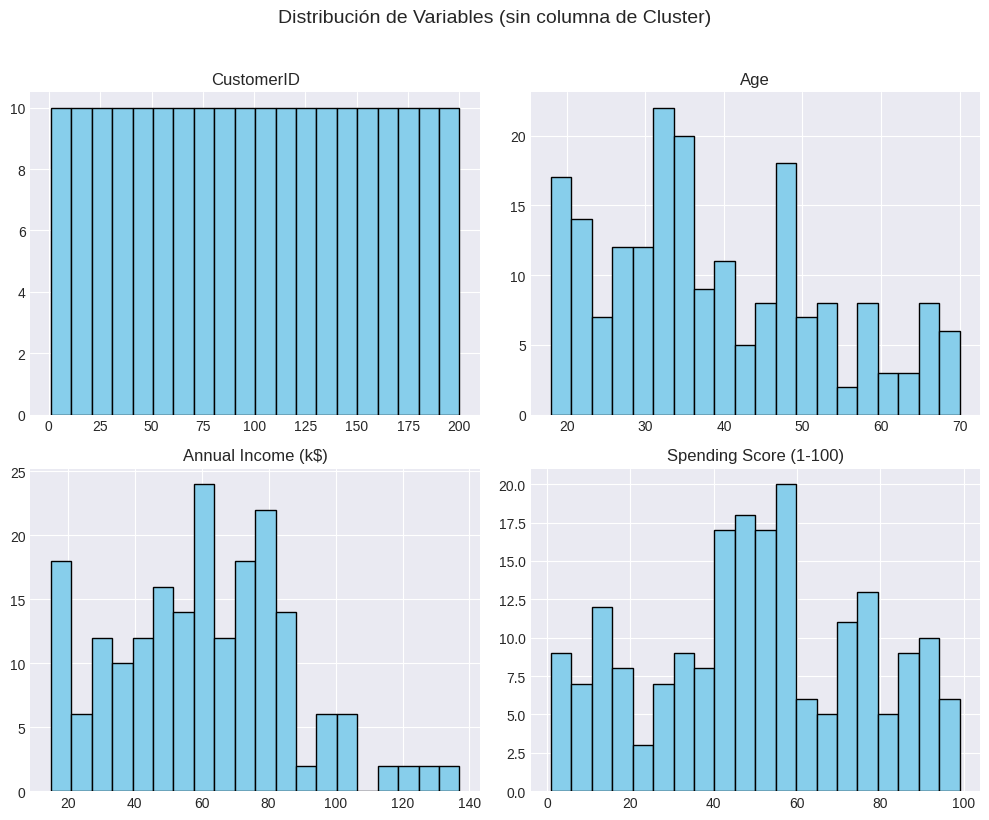

In [20]:
# ============================================================
# 📈 3. HISTOGRAMAS DE VARIABLES SIN CLUSTER
# ============================================================

df.drop(['KMeans_Cluster'], axis=1).hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribución de Variables (sin columna de Cluster)", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

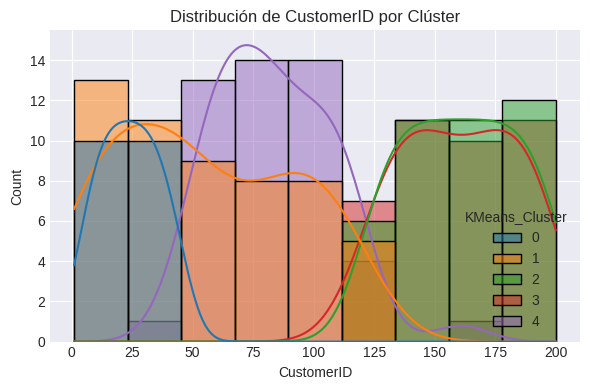

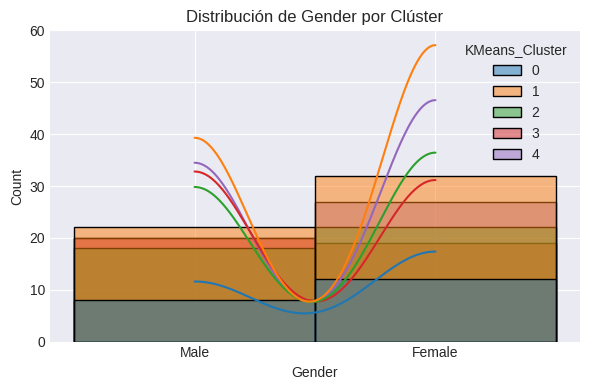

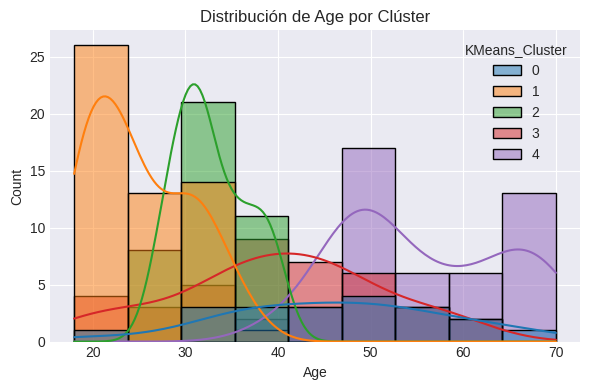

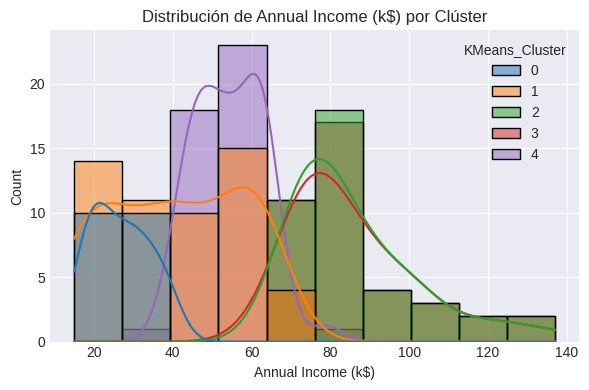

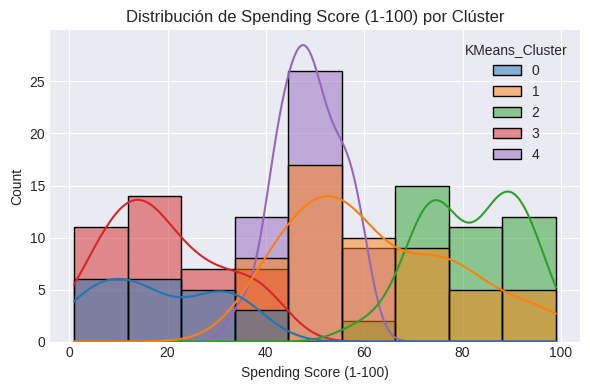

In [23]:
# ============================================================
# 🎨 4. DISTRIBUCIÓN DE VARIABLES POR CLUSTER
# ============================================================

variables = df.drop(['KMeans_Cluster'], axis=1).columns

for col in variables:
    plt.figure(figsize=(6, 4))
    sb.histplot(data=df, x=col, hue='KMeans_Cluster', kde=True, palette='tab10')
    plt.title(f"Distribución de {col} por Clúster")
    plt.tight_layout()
    plt.show()


Columnas usadas en el pairplot: ['CustomerID', 'Age', 'Annual Income (k$)']


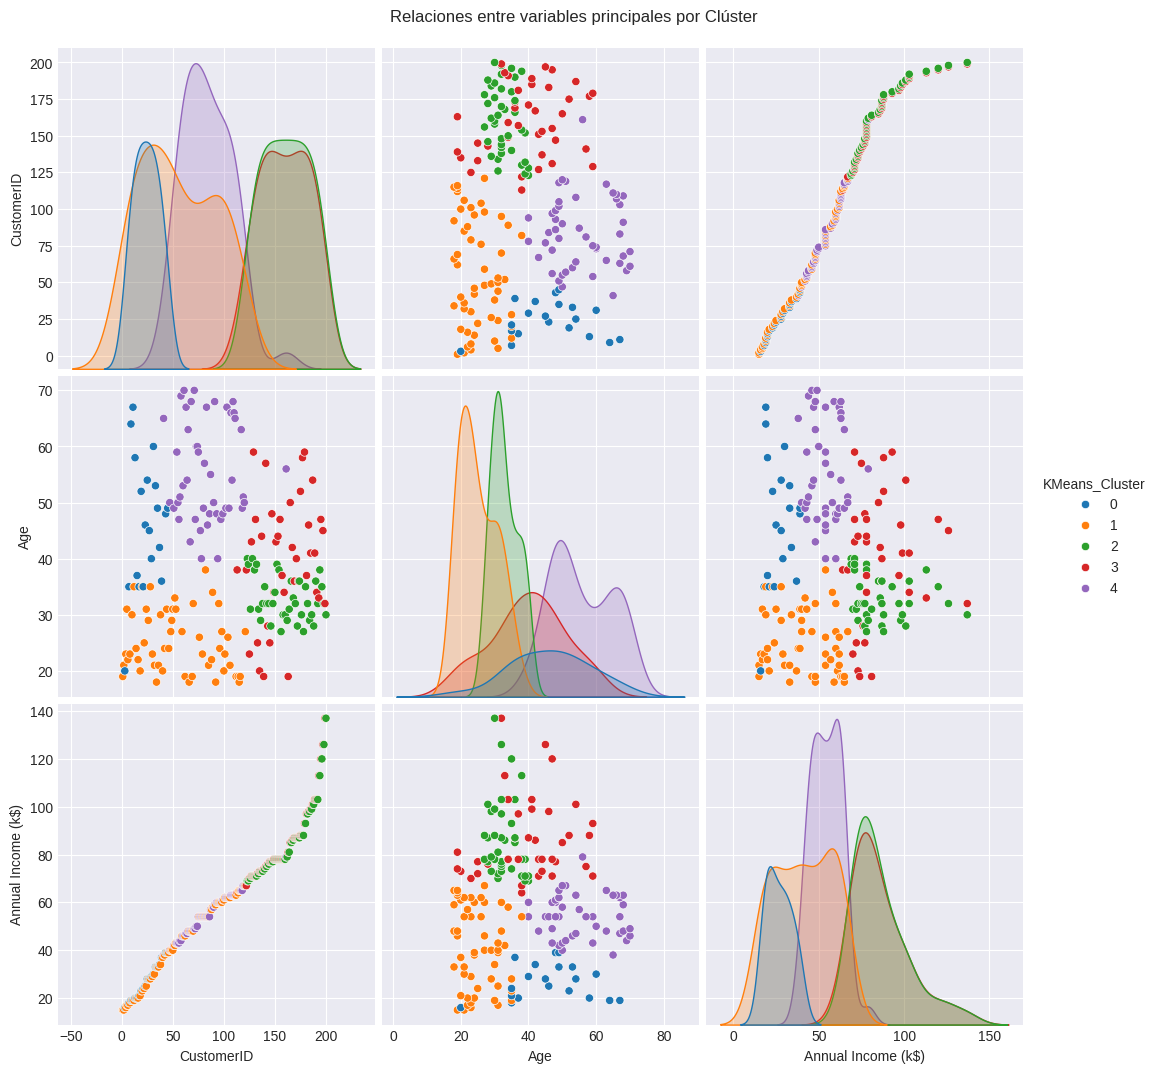

In [25]:
# ============================================================
# 🔍 5. PAIRPLOT DE VARIABLES PRINCIPALES
# ============================================================

# Seleccionar solo las columnas numéricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Evitar incluir la columna del clúster como variable (solo para 'hue')
cols_principales = [col for col in num_cols if col != 'KMeans_Cluster'][:3]

# Verificación opcional
print("Columnas usadas en el pairplot:", cols_principales)

# Graficar pairplot
sb.pairplot(
    df.dropna(),
    hue='KMeans_Cluster',
    vars=cols_principales,
    kind='scatter',
    height=3.5,
    palette='tab10'
)
plt.suptitle("Relaciones entre variables principales por Clúster", y=1.02)
plt.show()


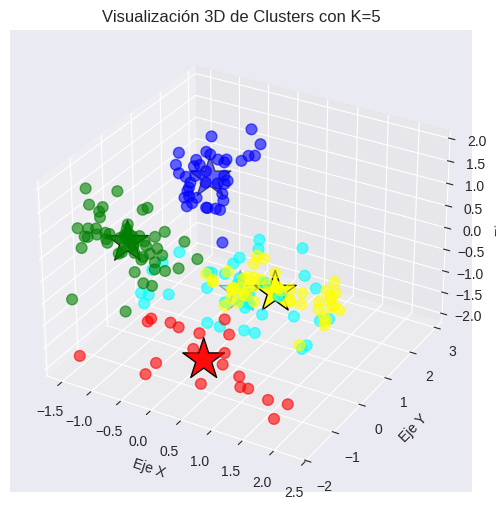

In [26]:
# ============================================================
# 🌐 6. VISUALIZACIÓN 3D DE LOS CLUSTERS
# ============================================================

from mpl_toolkits.mplot3d import Axes3D

X = X_scaled  # tus datos escalados (matriz numpy)
labels = kmeans_labels
C = kmeans.cluster_centers_

colores = ['red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'purple', 'pink']
asignar = [colores[label % len(colores)] for label in labels]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Puntos de datos
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60, alpha=0.6)

# Centros de los clusters
ax.scatter(C[:, 0], C[:, 1], C[:, 2],
           marker='*', c=colores[:len(C)], s=1000, edgecolor='k')

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.set_title(f'Visualización 3D de Clusters con K={k_optimal}')
plt.show()

In [27]:
# ============================================================
# 📊 6. ANÁLISIS DE GRUPOS (POST K-MEANS)
# ============================================================

import pandas as pd
from sklearn.metrics import pairwise_distances_argmin_min

# Crear copia del DataFrame con etiquetas de K-Means
copy = pd.DataFrame()
copy['usuario'] = df['usuario'].values if 'usuario' in df.columns else range(len(df))
copy['KMeans_Cluster'] = df['KMeans_Cluster'].values

# Si existe una categoría o clase original, la agregamos
if 'categoria' in df.columns:
    copy['categoria'] = df['categoria'].values

# Colores usados en la visualización
colores = ['red', 'green', 'blue', 'cyan', 'yellow', 'magenta', 'orange', 'purple', 'gray', 'brown']

# Contar cantidad de elementos por grupo
cantidadGrupo = pd.DataFrame({
    'Cluster': sorted(copy['KMeans_Cluster'].unique()),
    'Color': [colores[i] for i in sorted(copy['KMeans_Cluster'].unique())],
    'Cantidad': copy.groupby('KMeans_Cluster').size().values
})

print("=== CANTIDAD DE ELEMENTOS POR GRUPO ===")
print(cantidadGrupo)

=== CANTIDAD DE ELEMENTOS POR GRUPO ===
   Cluster   Color  Cantidad
0        0     red        20
1        1   green        54
2        2    blue        40
3        3    cyan        39
4        4  yellow        47



=== ANÁLISIS DE VARIABLES EN EL GRUPO 0 ===
Total de elementos en grupo 0: 20

Promedio de variables numéricas en el grupo 0:
Age                       46.25
Annual Income (k$)        26.75
CustomerID                24.10
Spending Score (1-100)    18.35
dtype: float64


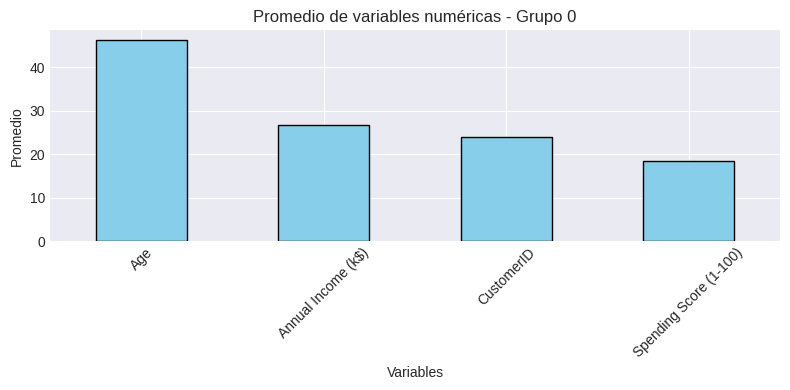

In [29]:
# ============================================================
# 🔍 7. ANÁLISIS DE CARACTERÍSTICAS INTERNAS DE UN CLÚSTER
# ============================================================

# Ejemplo: analizar el grupo 0
grupo_index = df['KMeans_Cluster'] == 0
grupo_ejemplo = df[grupo_index]

print("\n=== ANÁLISIS DE VARIABLES EN EL GRUPO 0 ===")
print(f"Total de elementos en grupo 0: {len(grupo_ejemplo)}")

# Seleccionar solo variables numéricas
variables_numericas = grupo_ejemplo.select_dtypes(include=['float64', 'int64'])

# Calcular promedios de las variables dentro del grupo
promedios = variables_numericas.mean().sort_values(ascending=False)

print("\nPromedio de variables numéricas en el grupo 0:")
print(promedios)

# ============================================================
# 📊  Visualización del grupo 0 (opcional)
# ============================================================
plt.figure(figsize=(8, 4))
promedios.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Promedio de variables numéricas - Grupo 0")
plt.xlabel("Variables")
plt.ylabel("Promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
# ============================================================
# 🧭 8. REPRESENTANTES DE CADA CLÚSTER
# ============================================================

# Obtener índices de los usuarios más cercanos al centroide de cada clúster
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X_scaled)

users = df['usuario'].values if 'usuario' in df.columns else range(len(df))

print("\n=== REPRESENTANTE DE CADA CLÚSTER ===")
for i, row in enumerate(closest):
    print(f"Cluster {i}: Usuario {users[row]}")


=== REPRESENTANTE DE CADA CLÚSTER ===
Cluster 0: Usuario 34
Cluster 1: Usuario 45
Cluster 2: Usuario 175
Cluster 3: Usuario 166
Cluster 4: Usuario 80


In [32]:
# ===============================================
# RESULTADOS DE CALIDAD DEL CLUSTERING
# ===============================================
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print(f"\n=== RESULTADOS K-MEANS (K={k_optimal}) ===")
print(f"Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_scaled, kmeans_labels):.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, kmeans_labels):.4f}")



=== RESULTADOS K-MEANS (K=5) ===
Silhouette Score: 0.4166
Davies-Bouldin Index: 0.8746
Calinski-Harabasz Score: 125.1009


# Algoritmo 2 - Hierarchical Clustering (CON DENDROGRAMA)

Descripción:
Construye una jerarquía de clusters formando un árbol. Puede ser aglomerativo (bottom-up) o divisivo (top-down).
Ventajas: No necesita especificar K previamente, produce dendrograma
Desventajas: Computacionalmente costoso para grandes datasets

In [33]:
# DENDROGRAMA - Visualización jerárquica
print("\n=== HIERARCHICAL CLUSTERING ===")


=== HIERARCHICAL CLUSTERING ===


In [34]:
# Calcular linkage matrix
linkage_matrix = linkage(X_scaled, method='ward')


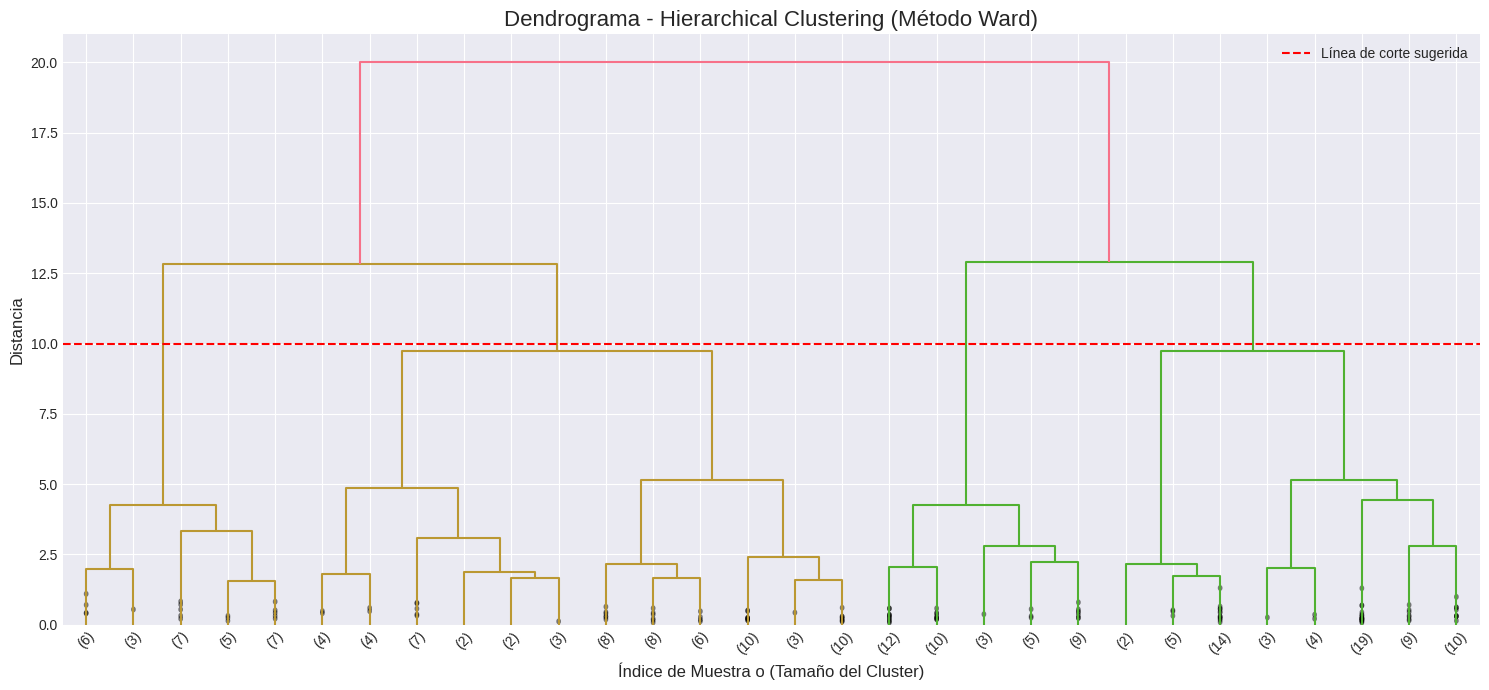

In [35]:

# Crear dendrograma
plt.figure(figsize=(15, 7))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # Muestra solo los últimos p clusters
    p=30,  # Número de clusters a mostrar
    leaf_font_size=10,
    show_contracted=True
)
plt.title('Dendrograma - Hierarchical Clustering (Método Ward)', fontsize=16)
plt.xlabel('Índice de Muestra o (Tamaño del Cluster)', fontsize=12)
plt.ylabel('Distancia', fontsize=12)
plt.axhline(y=10, color='r', linestyle='--', label='Línea de corte sugerida')
plt.legend()
plt.tight_layout()
plt.show()

Interpretación del dendrograma

Cada rama o nodo representa una fusión de grupos.

La altura donde dos ramas se unen representa la distancia entre los grupos fusionados.

Cuanto más baja la unión → más similares son los grupos.

Cuanto más alta la unión → más diferentes son.

Si cortas horizontalmente el dendrograma (por ejemplo, en la línea roja y=10), los grupos debajo de esa línea se consideran tus clústeres finales.

In [37]:
# Aplicar clustering jerárquico
n_clusters_hc = 5
hierarchical = AgglomerativeClustering(n_clusters=n_clusters_hc, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

df['Hierarchical_Cluster'] = hierarchical_labels

print(f"\nNúmero de clusters: {n_clusters_hc}")
print(f"Silhouette Score: {silhouette_score(X_scaled, hierarchical_labels):.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_scaled, hierarchical_labels):.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, hierarchical_labels):.4f}")



Número de clusters: 5
Silhouette Score: 0.3900
Davies-Bouldin Index: 0.9163
Calinski-Harabasz Score: 107.8266


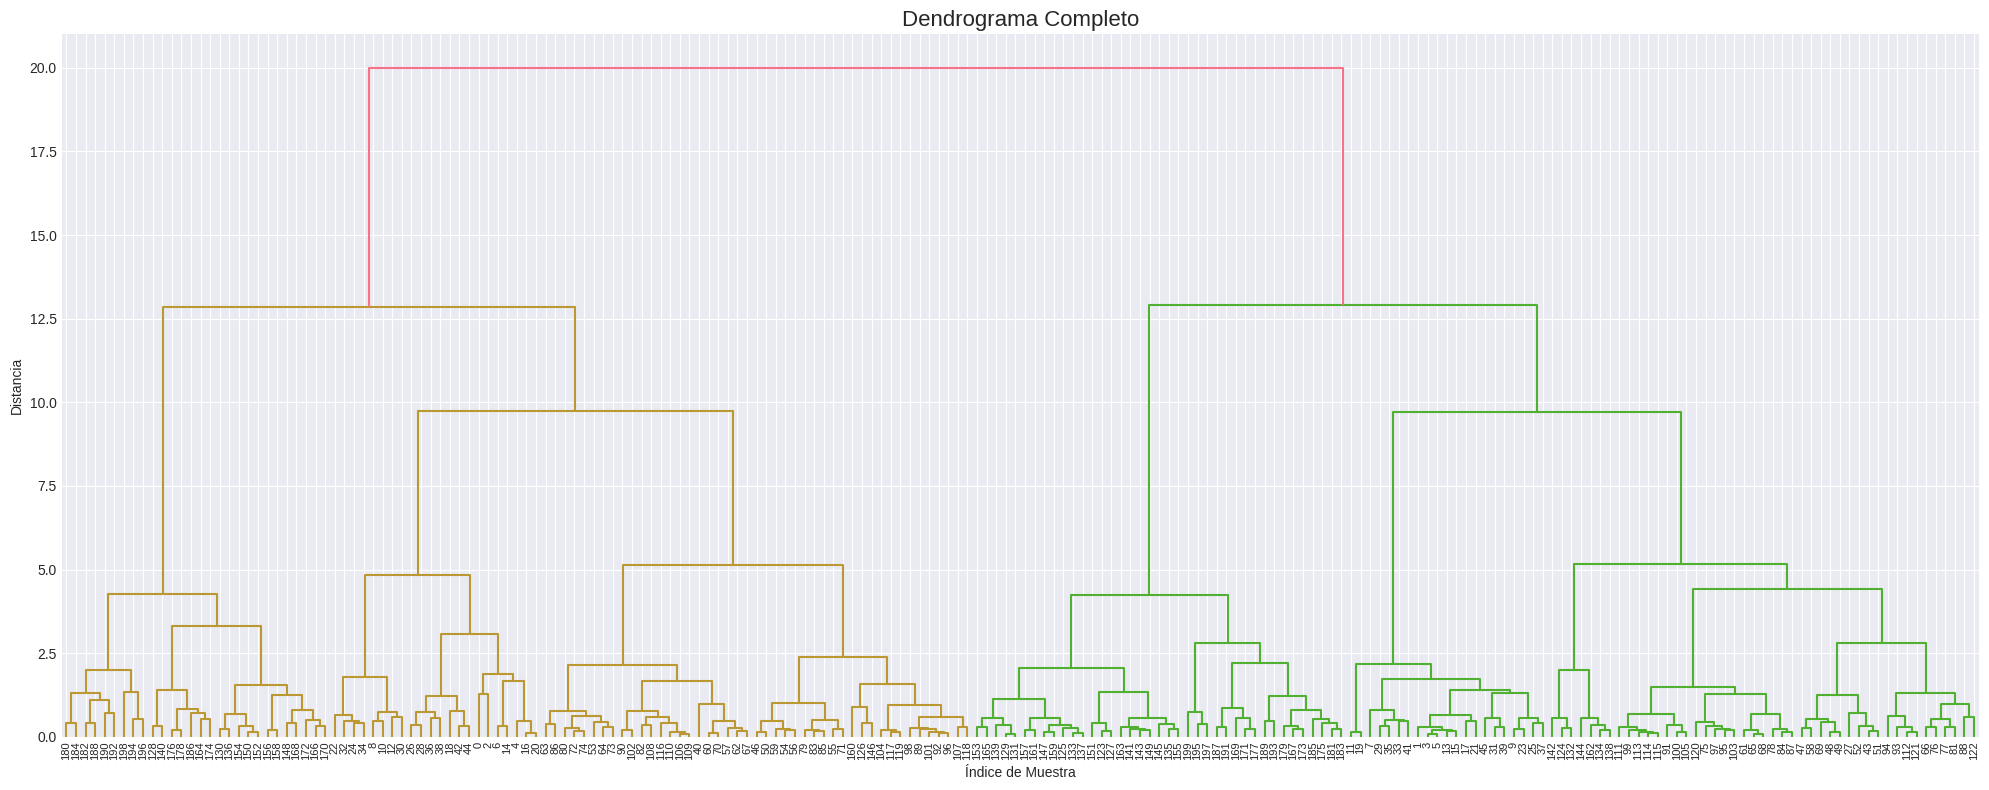

In [38]:
# Dendrograma completo (opcional, para dataset pequeño)
plt.figure(figsize=(20, 8))
dendrogram(linkage_matrix, leaf_font_size=8)
plt.title('Dendrograma Completo', fontsize=16)
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.tight_layout()
plt.show()

# Algoritmo 3 - DBSCAN


Descripción:
Clustering basado en densidad. Identifica clusters como áreas de alta densidad separadas por áreas de baja densidad.
Ventajas: Encuentra clusters de forma arbitraria, identifica outliers, no necesita K
Desventajas: Sensible a parámetros eps y min_samples

In [39]:
print("\n=== DBSCAN ===")

# Probar diferentes valores de eps
from sklearn.neighbors import NearestNeighbors



=== DBSCAN ===


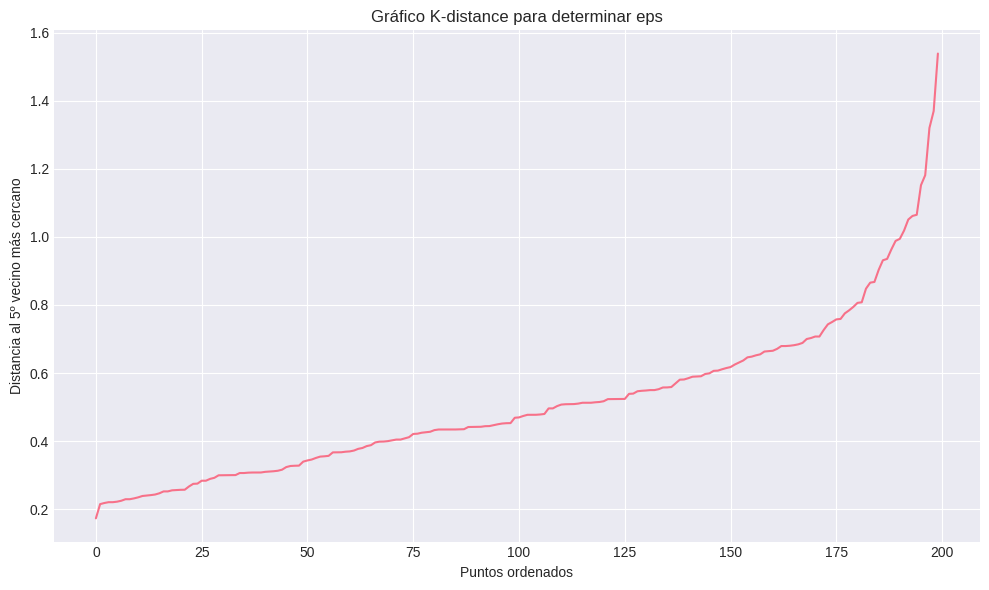

In [40]:
# Gráfico de distancias K-nearest neighbors para determinar eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al 5º vecino más cercano')
plt.title('Gráfico K-distance para determinar eps')
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
# Aplicar DBSCAN
eps_value = 0.5  # Ajusta este valor según el gráfico anterior
min_samples_value = 5

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_labels = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = dbscan_labels


In [43]:
# Contar número de clusters y outliers
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_outliers = list(dbscan_labels).count(-1)

print(f"\nParámetros: eps={eps_value}, min_samples={min_samples_value}")
print(f"Número de clusters encontrados: {n_clusters_dbscan}")
print(f"Número de outliers detectados: {n_outliers}")

if n_clusters_dbscan > 1:
    # Solo calcular métricas si hay más de 1 cluster (excluyendo outliers)
    mask = dbscan_labels != -1
    if mask.sum() > 0:
        print(f"Silhouette Score: {silhouette_score(X_scaled[mask], dbscan_labels[mask]):.4f}")
        print(f"Davies-Bouldin Index: {davies_bouldin_score(X_scaled[mask], dbscan_labels[mask]):.4f}")
        print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled[mask], dbscan_labels[mask]):.4f}")
else:
    print("No se encontraron suficientes clusters para calcular métricas")


Parámetros: eps=0.5, min_samples=5
Número de clusters encontrados: 6
Número de outliers detectados: 60
Silhouette Score: 0.4817
Davies-Bouldin Index: 0.6386
Calinski-Harabasz Score: 117.8049


# Algoritmo 4 - Gaussian Mixture Model (GMM)


Modelo probabilístico que asume que los datos provienen de una mezcla de distribuciones Gaussianas.
Ventajas: Proporciona probabilidades de pertenencia, clusters elípticos, flexible
Desventajas: Puede sobreajustar, sensible a inicialización

In [44]:
print("\n=== GAUSSIAN MIXTURE MODEL ===")

# Encontrar número óptimo de componentes usando BIC y AIC
n_components_range = range(2, 11)
bic_scores = []
aic_scores = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42, n_init=10)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))
    aic_scores.append(gmm.aic(X_scaled))


=== GAUSSIAN MIXTURE MODEL ===


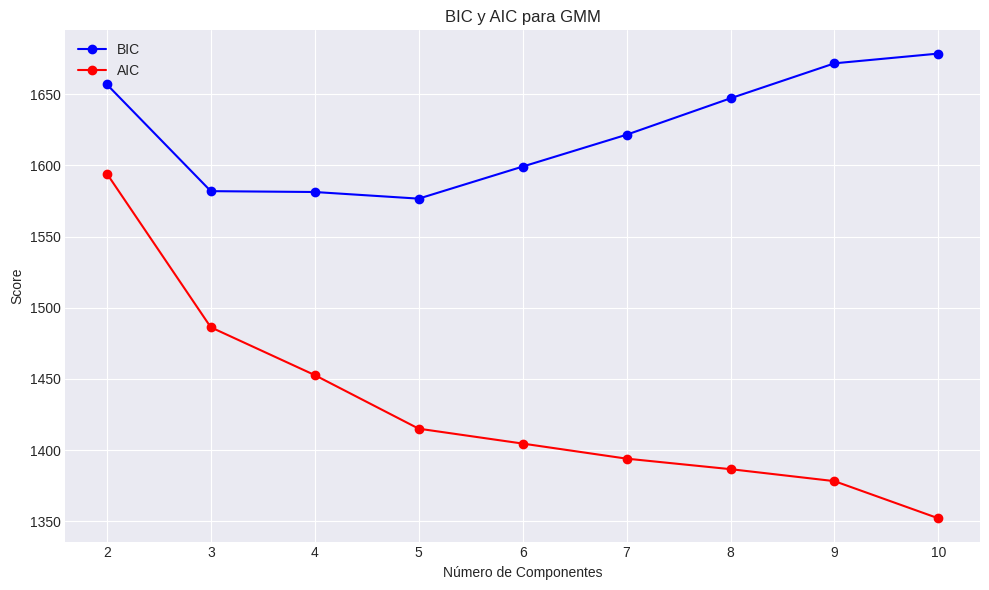

In [45]:
# Visualizar BIC y AIC
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic_scores, 'bo-', label='BIC')
plt.plot(n_components_range, aic_scores, 'ro-', label='AIC')
plt.xlabel('Número de Componentes')
plt.ylabel('Score')
plt.title('BIC y AIC para GMM')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
# Aplicar GMM con número óptimo de componentes
n_components_optimal = 5
gmm = GaussianMixture(n_components=n_components_optimal, random_state=42, n_init=10)
gmm_labels = gmm.fit_predict(X_scaled)
gmm_probs = gmm.predict_proba(X_scaled)

df['GMM_Cluster'] = gmm_labels

print(f"\nNúmero de componentes: {n_components_optimal}")
print(f"Silhouette Score: {silhouette_score(X_scaled, gmm_labels):.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_scaled, gmm_labels):.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, gmm_labels):.4f}")
print(f"BIC Score: {gmm.bic(X_scaled):.2f}")
print(f"AIC Score: {gmm.aic(X_scaled):.2f}")


Número de componentes: 5
Silhouette Score: 0.4064
Davies-Bouldin Index: 0.9356
Calinski-Harabasz Score: 116.9009
BIC Score: 1576.71
AIC Score: 1415.09


# Comparación Visual de Todos los Algoritmos

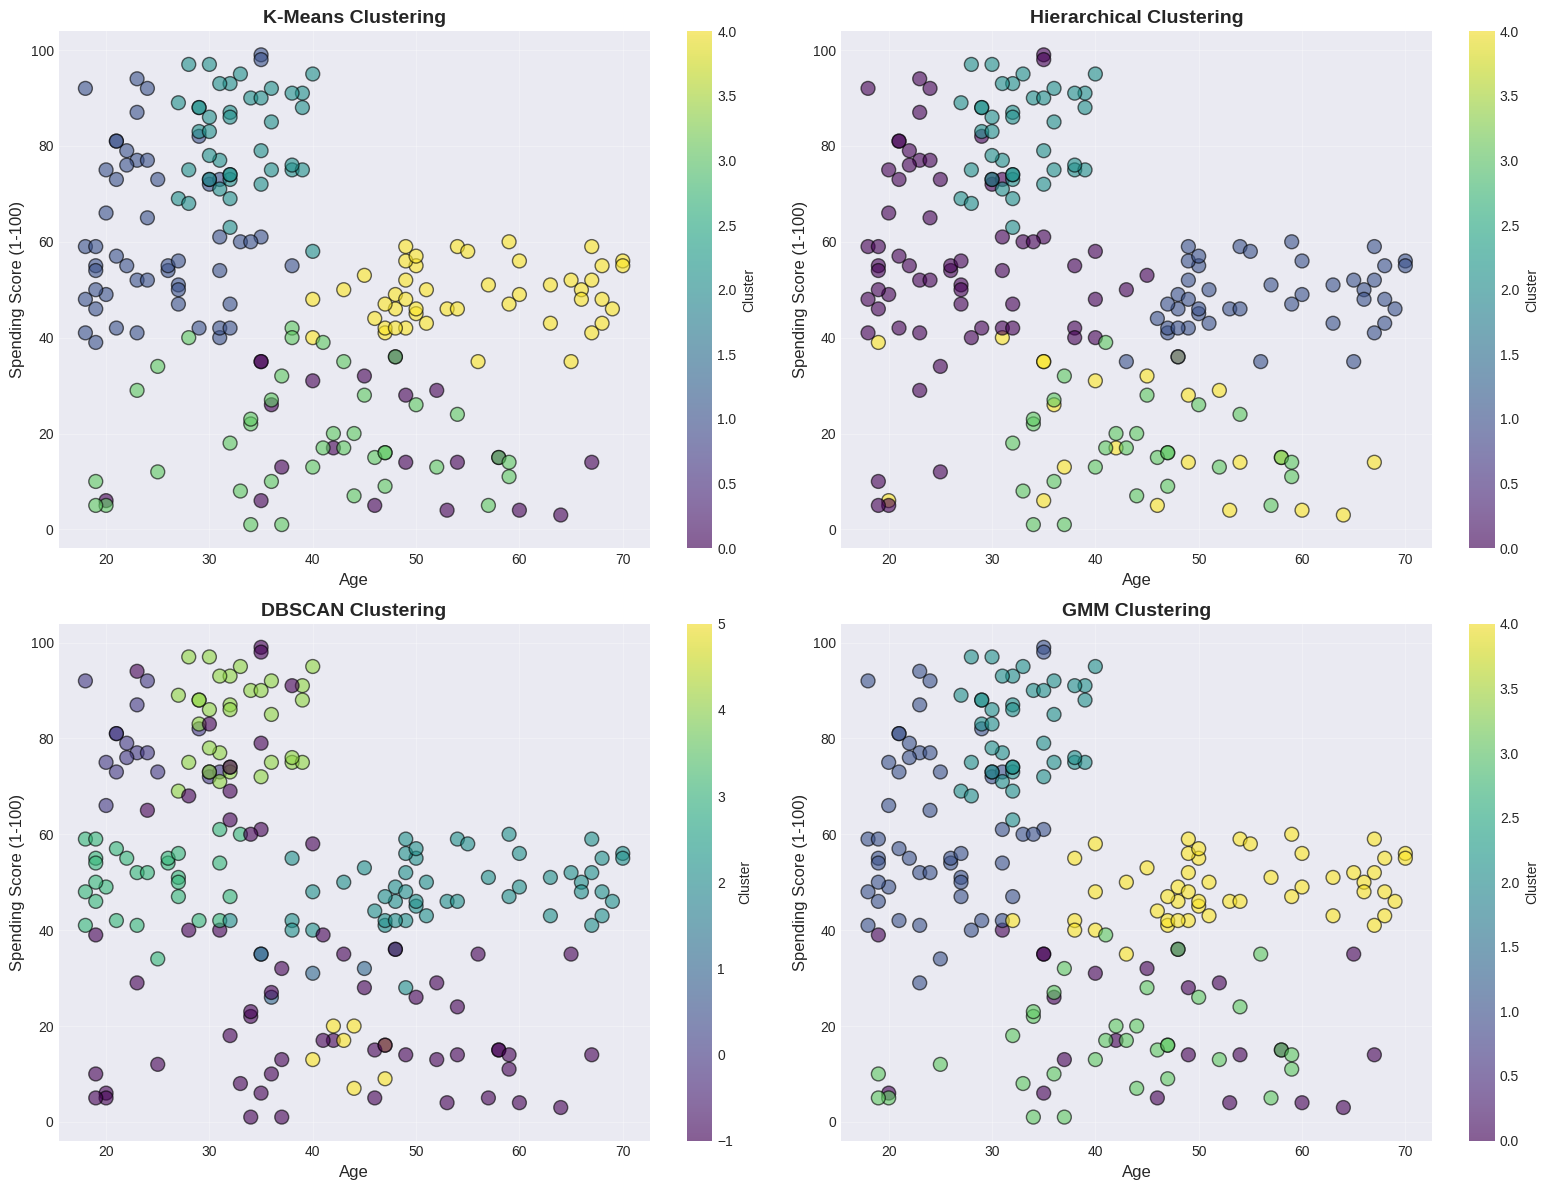

In [47]:
# Visualización comparativa en 2D (Age vs Spending Score)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

algorithms = [
    ('K-Means', kmeans_labels),
    ('Hierarchical', hierarchical_labels),
    ('DBSCAN', dbscan_labels),
    ('GMM', gmm_labels)
]

for idx, (name, labels) in enumerate(algorithms):
    ax = axes[idx // 2, idx % 2]

    scatter = ax.scatter(
        df['Age'],
        df['Spending Score (1-100)'],
        c=labels,
        cmap='viridis',
        s=100,
        alpha=0.6,
        edgecolors='black'
    )

    ax.set_xlabel('Age', fontsize=12)
    ax.set_ylabel('Spending Score (1-100)', fontsize=12)
    ax.set_title(f'{name} Clustering', fontsize=14, fontweight='bold')
    plt.colorbar(scatter, ax=ax, label='Cluster')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

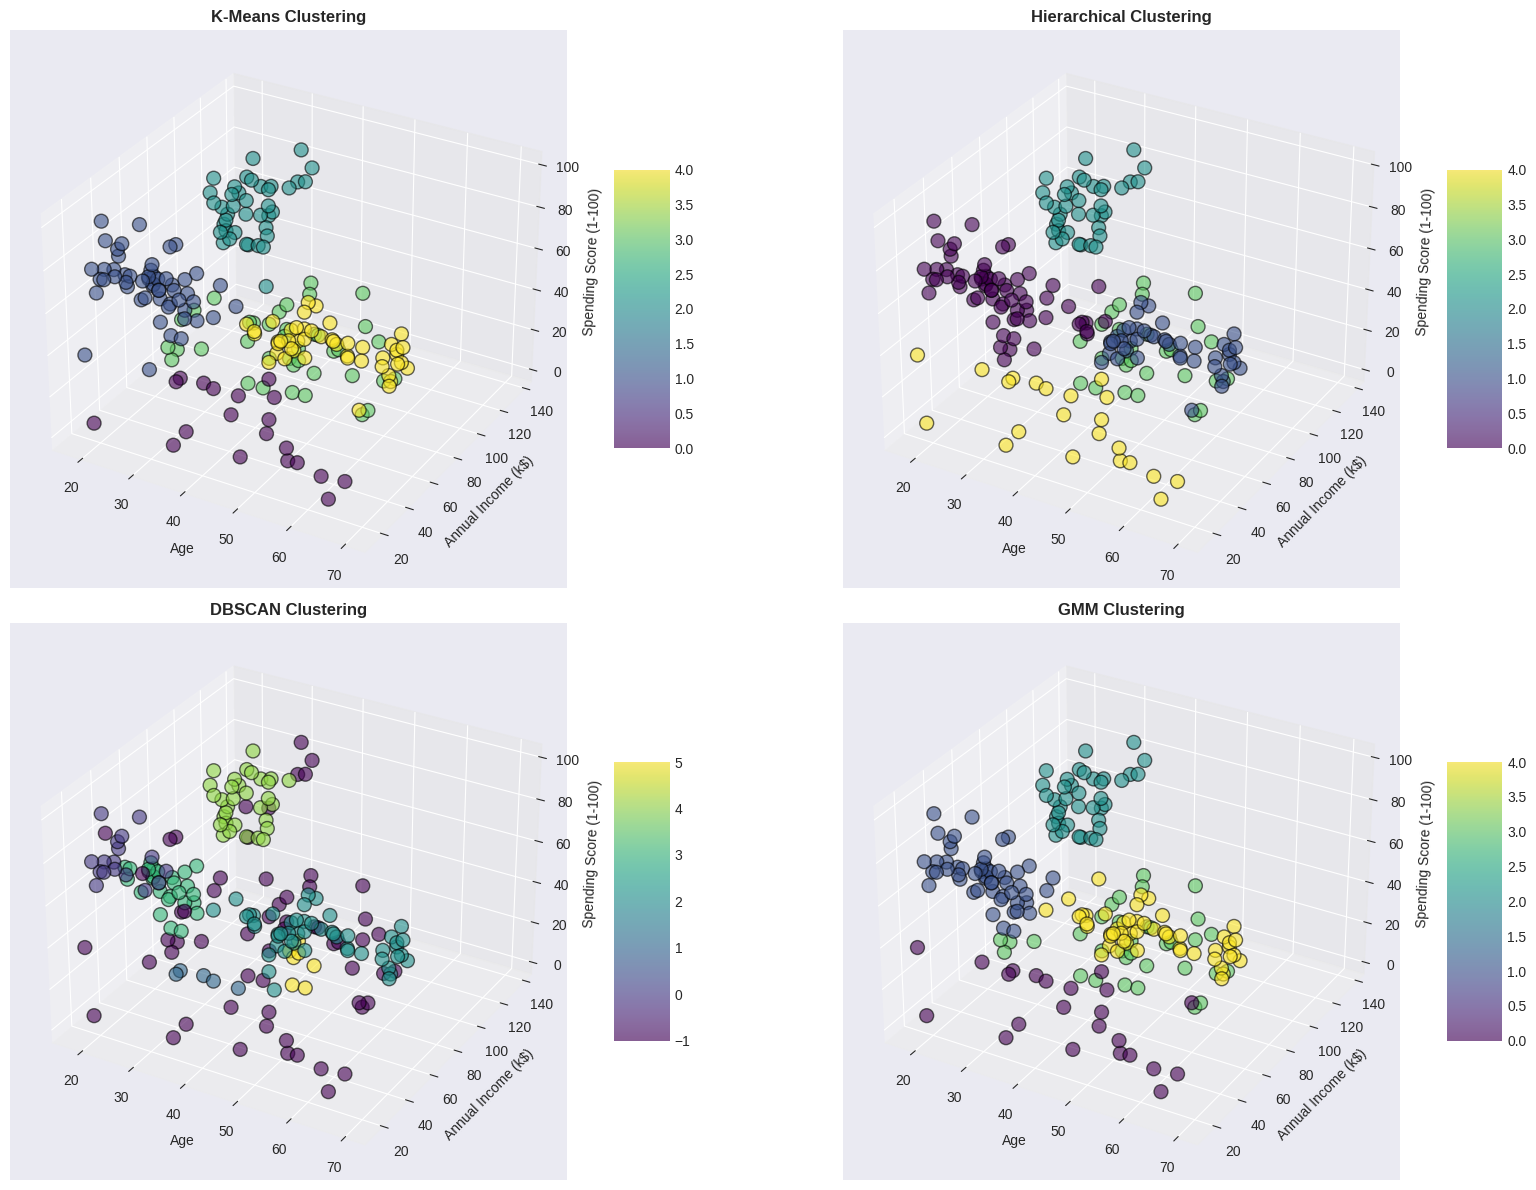

In [48]:
# Visualización 3D comparativa
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 12))

for idx, (name, labels) in enumerate(algorithms):
    ax = fig.add_subplot(2, 2, idx + 1, projection='3d')

    scatter = ax.scatter(
        df['Age'],
        df['Annual Income (k$)'],
        df['Spending Score (1-100)'],
        c=labels,
        cmap='viridis',
        s=100,
        alpha=0.6,
        edgecolors='black'
    )

    ax.set_xlabel('Age')
    ax.set_ylabel('Annual Income (k$)')
    ax.set_zlabel('Spending Score (1-100)')
    ax.set_title(f'{name} Clustering', fontweight='bold')
    plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()


# Tabla Comparativa de Métricas

In [49]:
# Crear tabla comparativa
comparison_data = {
    'Algoritmo': ['K-Means', 'Hierarchical', 'DBSCAN', 'GMM'],
    'Silhouette Score': [
        silhouette_score(X_scaled, kmeans_labels),
        silhouette_score(X_scaled, hierarchical_labels),
        silhouette_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1]) if n_clusters_dbscan > 1 else 0,
        silhouette_score(X_scaled, gmm_labels)
    ],
    'Davies-Bouldin Index': [
        davies_bouldin_score(X_scaled, kmeans_labels),
        davies_bouldin_score(X_scaled, hierarchical_labels),
        davies_bouldin_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1]) if n_clusters_dbscan > 1 else 0,
        davies_bouldin_score(X_scaled, gmm_labels)
    ],
    'Calinski-Harabasz Score': [
        calinski_harabasz_score(X_scaled, kmeans_labels),
        calinski_harabasz_score(X_scaled, hierarchical_labels),
        calinski_harabasz_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1]) if n_clusters_dbscan > 1 else 0,
        calinski_harabasz_score(X_scaled, gmm_labels)
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + "="*80)
print("COMPARACIÓN DE ALGORITMOS DE CLUSTERING")
print("="*80)
print(comparison_df.to_string(index=False))
print("\nInterpretación de métricas:")
print("- Silhouette Score: Valores cercanos a 1 indican mejor clustering (rango: -1 a 1)")
print("- Davies-Bouldin Index: Valores más bajos indican mejor clustering")
print("- Calinski-Harabasz Score: Valores más altos indican mejor clustering")


COMPARACIÓN DE ALGORITMOS DE CLUSTERING
   Algoritmo  Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Score
     K-Means          0.416643              0.874551               125.100940
Hierarchical          0.390028              0.916289               107.826560
      DBSCAN          0.481715              0.638575               117.804913
         GMM          0.406367              0.935599               116.900931

Interpretación de métricas:
- Silhouette Score: Valores cercanos a 1 indican mejor clustering (rango: -1 a 1)
- Davies-Bouldin Index: Valores más bajos indican mejor clustering
- Calinski-Harabasz Score: Valores más altos indican mejor clustering


# Análisis de Clusters por Algoritmo

In [50]:
# Análisis descriptivo por cluster para cada algoritmo
for algo_name in ['KMeans', 'Hierarchical', 'DBSCAN', 'GMM']:
    col_name = f'{algo_name}_Cluster'
    print(f"\n{'='*80}")
    print(f"ANÁLISIS DE CLUSTERS - {algo_name.upper()}")
    print(f"{'='*80}")

    cluster_analysis = df.groupby(col_name).agg({
        'Age': ['mean', 'std', 'count'],
        'Annual Income (k$)': ['mean', 'std'],
        'Spending Score (1-100)': ['mean', 'std']
    }).round(2)

    print(cluster_analysis)


ANÁLISIS DE CLUSTERS - KMEANS
                  Age              Annual Income (k$)         \
                 mean    std count               mean    std   
KMeans_Cluster                                                 
0               46.25  11.58    20              26.75   7.31   
1               25.19   5.51    54              41.09  16.82   
2               32.88   3.86    40              86.10  16.34   
3               39.87  10.94    39              86.10  16.73   
4               55.64   8.91    47              54.38   8.82   

               Spending Score (1-100)         
                                 mean    std  
KMeans_Cluster                                
0                               18.35  11.94  
1                               62.24  16.60  
2                               81.53  10.00  
3                               19.36  11.61  
4                               48.85   6.30  

ANÁLISIS DE CLUSTERS - HIERARCHICAL
                        Age              An

# Guardar Resultados


In [51]:
# Guardar DataFrame con todas las etiquetas
df.to_csv('clustering_results.csv', index=False)
print("\nResultados guardados en 'clustering_results.csv'")

# Guardar métricas de comparación
comparison_df.to_csv('comparison_metrics.csv', index=False)
print("Métricas de comparación guardadas en 'comparison_metrics.csv'")


Resultados guardados en 'clustering_results.csv'
Métricas de comparación guardadas en 'comparison_metrics.csv'


# Interpretación de las Métricas:

Silhouette Score (-1 a 1): Mide qué tan similar es un objeto a su propio cluster comparado con otros clusters. Valores cercanos a 1 son mejores.
Davies-Bouldin Index (≥0): Mide la separación entre clusters. Valores más bajos indican mejor clustering.
Calinski-Harabasz Score (≥0): Ratio de dispersión entre-clusters vs intra-cluster. Valores más altos indican mejor clustering.


# Recomendaciones Finales:

K-Means: Usa cuando esperas clusters esféricos y balanceados
Hierarchical: Usa cuando quieres entender la estructura jerárquica (el dendrograma te ayuda muchísimo)
DBSCAN: Usa cuando tienes outliers o clusters de forma irregular
GMM: Usa cuando quieres asignaciones probabilísticas o clusters elípticos